# Support Vector Regressor

Dataset
This dataset is created for prediction of graduate admissions:

Features in the dataset:

GRE Scores (290 to 340)

TOEFL Scores (92 to 120)

University Rating (1 to 5)

Statement of Purpose (1 to 5)

Letter of Recommendation Strength (1 to 5)

Undergraduate CGPA (6.8 to 9.92)

Research Experience (0 or 1)

Chance of Admit (0.34 to 0.97)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.shape

(500, 9)

In [5]:
#Checking for null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
dtype.

In [42]:
# Identifying numeric columns
numeric_col = [columns for columns in data.columns if data[columns].dtype != 'O']

In [50]:
numeric_col = numeric_col[1:]

In [51]:
numeric_col

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

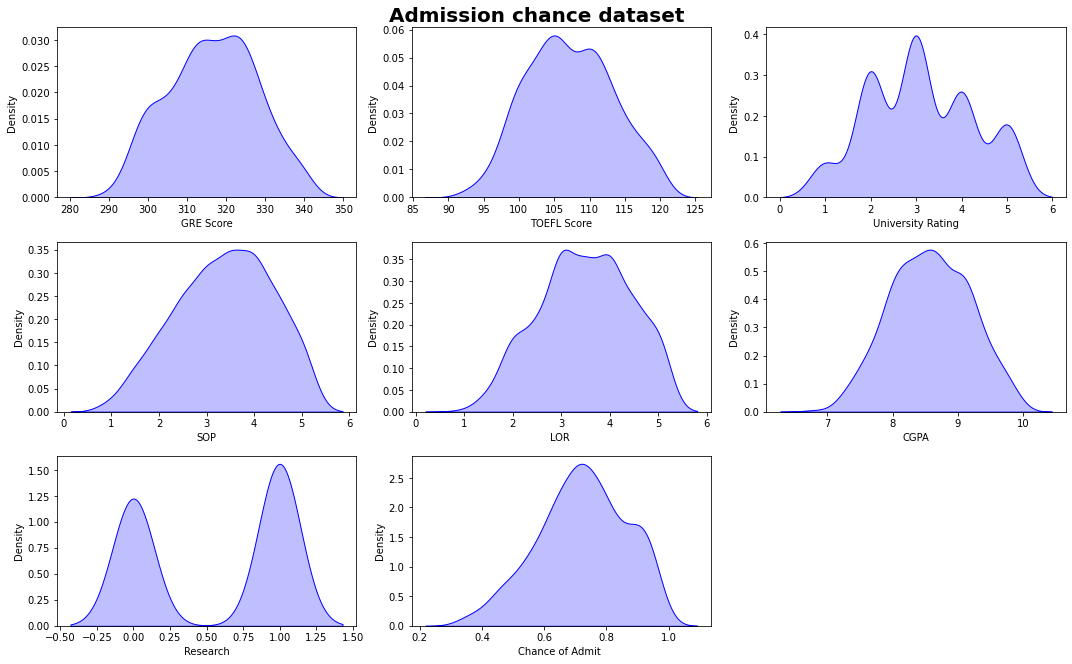

In [56]:
plt.figure(figsize = (15,15))
plt.suptitle("Admission chance dataset", fontsize=20, fontweight='bold')
for i in range(0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[numeric_col[i]], shade = True, color ='b')
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

In [8]:
x = data.drop(columns=['Chance of Admit '])

In [9]:
y = data['Chance of Admit ']

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 10)

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(x_train)

StandardScaler()

In [20]:
x_train_sd = pd.DataFrame(scaler.transform(x_train))

In [21]:
x_test_Sd = pd.DataFrame(scaler.transform(x_test))

In [22]:
from sklearn.svm import SVR

In [23]:
svr = SVR()

In [24]:
svr.fit(x_train_sd, y_train)

SVR()

In [28]:
y_test_pred = svr.predict(x_test_Sd)

In [29]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(y_test, y_test_pred)

In [33]:
r2

0.7538276071635838

In [38]:
adjusted_r2 = 1 - ((1-r2)*(len(y_test)-1))/(len(y_test)-(x_test.shape[1])-1)


In [39]:
adjusted_r2

0.7368502007610723